# Phenomenological model constraining: application

![image.png](../slides/jetset_slides/jetset_slides.025.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc4


In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[2])


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv


In [4]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



In [5]:
sed_data.save('Mrk_501.pkl')

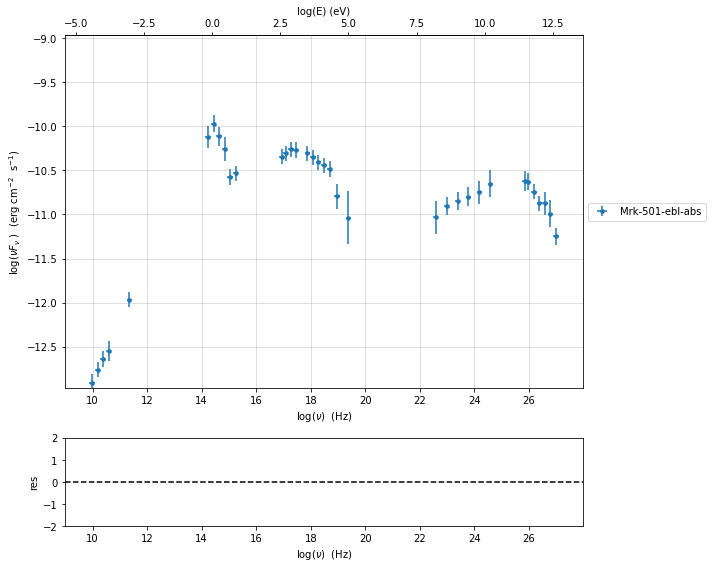

In [6]:
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



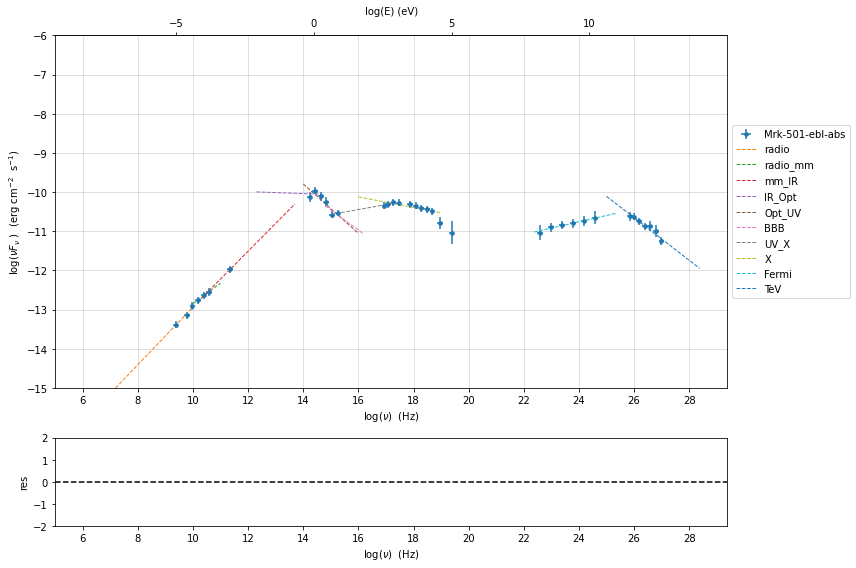

In [7]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP




model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-7.183721e-02,-7.183721e-02,1.342816e-02,--,-5.476368e-02,-1.000000e+01,0.000000e+00,False
LogCubic,c,-2.748340e-03,-2.748340e-03,2.032578e-03,--,3.836062e-03,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,1.697125e+01,1.697125e+01,1.518737e-01,--,1.603684e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.029149e+01,-1.029149e+01,3.606744e-02,--,-1.021039e+01,-3.000000e+01,0.000000e+00,False
host_galaxy,nuFnu_p_host,-1.007784e+01,-1.007784e+01,7.829484e-02,--,-1.021039e+01,-1.221039e+01,-8.210394e+00,False
host_galaxy,nu_scale,6.364526e-02,6.364526e-02,1.024915e-03,--,0.000000e+00,-5.000000e-01,5.000000e-01,False


---> sync       nu_p=+1.697125e+01 (err=+1.518737e-01)  nuFnu_p=-1.029149e+01 (err=+3.606744e-02) curv.=-7.183721e-02 (err=+1.342816e-02)

┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  -0.072   │   0.013   │   -0.014   │   0.014    │   -10   │    0    │       │
│ 1 │ par_1 │  -0.0027  │  0.0020   │  -0.0020   │   0.0020   │   -10   │   10    │       │
│ 2 │ par_2 │   16.97   │   0.15    │   -0.15    │    0.16    │    0    │   30    │       │
│ 3 │ par_3 │  -10.29   │   0.04    │   -0.04    │    0.04    │   -30   │    0    │       │
│ 4 │ par_4 │  -10.08   │   0.08    │   -0.08    │    0.08    │-12.2104 │-8.21039 │       │
│ 5 │ par_5 │  0.0636   │  0.0010   │  -0.0010   │   0.0072   │  -0.5   │   0.5   │       │
└───┴───────┴───────────┴────────

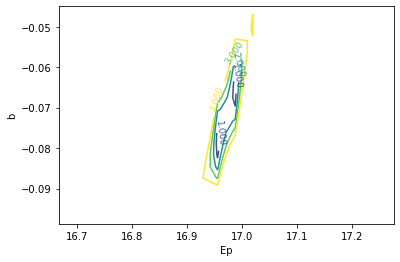

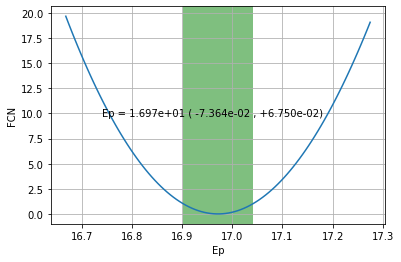

In [8]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='minuit',
                  silent=True,
                  fit_range=[10,21])


mm.minimizer.minos_errors()
x,y,z,fig,ax=mm.minimizer.draw_contour('Ep','b')
x,y,fig,ax=mm.minimizer.draw_profile('Ep')


*** Log-Polynomial fitting of the IC component ***
---> fit range: [21, 29]
---> LogCubic fit
-------------------------------------------------------------------------
Fit report

Model: IC-shape-fit


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
LogCubic,b,curvature,,-1.547080e-01,-1.000000e+01,0.000000e+00,False,False
LogCubic,c,third-degree,,-3.773118e-02,-1.000000e+01,1.000000e+01,False,False
LogCubic,Ep,peak freq,Hz,2.526637e+01,0.000000e+00,3.000000e+01,True,False
LogCubic,Sp,peak flux,erg / (cm2 s),-1.057499e+01,-3.000000e+01,0.000000e+00,True,False



converged=True
calls=8
mesg=


'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000 and the relative error between two consecutive iterates is at \n  most 0.000000'

dof=9
chisq=1.441196, chisq/red=0.160133 null hypothesis sig=0.997560

stats without the UL
dof  UL=9
chisq=1.441196, chisq/red=0.160133 null hypothesis sig=0.997560


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.547080e-01,-1.547080e-01,1.475869e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-3.773118e-02,-3.773118e-02,6.449603e-03,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.526637e+01,2.526637e+01,6.717304e-02,--,2.526894e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.057499e+01,-1.057499e+01,2.337071e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


-------------------------------------------------------------------------





model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
LogCubic,b,-1.547080e-01,-1.547080e-01,1.475869e-02,--,-1.000000e+00,-1.000000e+01,0.000000e+00,False
LogCubic,c,-3.773118e-02,-3.773118e-02,6.449603e-03,--,-1.000000e+00,-1.000000e+01,1.000000e+01,False
LogCubic,Ep,2.526637e+01,2.526637e+01,6.717304e-02,--,2.526894e+01,0.000000e+00,3.000000e+01,False
LogCubic,Sp,-1.057499e+01,-1.057499e+01,2.337071e-02,--,-1.000000e+01,-3.000000e+01,0.000000e+00,False


---> IC         nu_p=+2.526637e+01 (err=+6.717304e-02)  nuFnu_p=-1.057499e+01 (err=+2.337071e-02) curv.=-1.547080e-01 (err=+1.475869e-02)



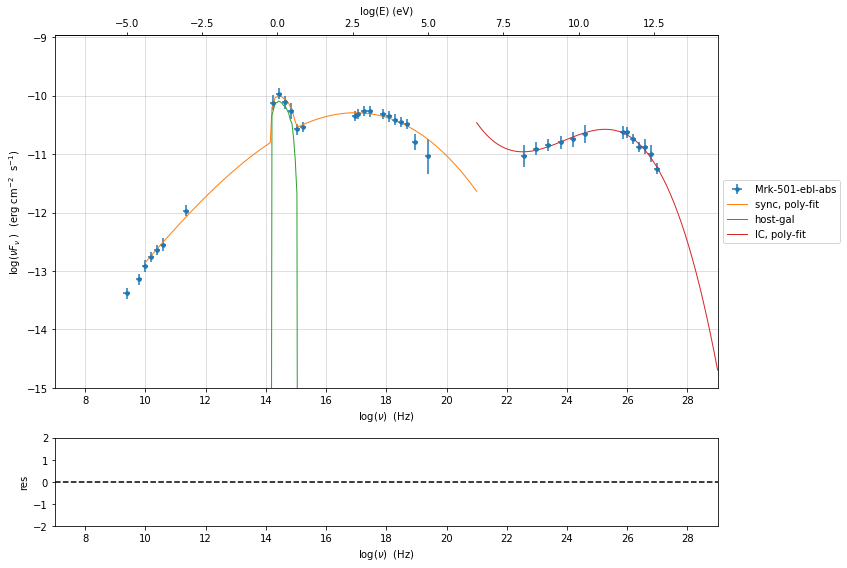

In [9]:
my_shape.IC_fit(fit_range=[21,29],minimizer='lsb')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15,x_min=7,x_max=29)

In [10]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=15,
                        B_range=[0.01,0.1],
                        distr_e='lppl',
                        t_var_sec=1*86400,
                        nu_cut_IR=5E10,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=True,silent=False)


***  constrains parameters from observable ***


---> ***  emitting region parameters  ***

---> setting par type redshift, corresponding to par z_cosm

---> setting par type magnetic_field, corresponding to par B=5.500000e-02

---> setting par type region_size, corresponding to par R=3.759008e+16
---> completed True


---> *** electron distribution parameters ***
---> emitters distribution spectral type lp
---> emitters distribution name lppl

---> r elec. spec. curvature =3.591861e-01
---> setting par type curvature, corresponding to par r

---> s_radio_mm -0.47152657988709734 1.9430531597741947
---> s_X 3.269798782130266
---> s_Fermi 1.742749327549109
---> s_UV_X 2.745697034461969
---> s_Opt_UV -1.6299328530633286 4.259865706126657
---> s from synch log-log fit -1.0
---> s from (s_Fermi + s_UV)/2
---> power-law index s, class obj=HSP s chosen is 2.244223
---> setting par type LE_spectral_slope, corresponding to par s
---> task completed True

---> setting gamma_3p_Sync= 1.780215e+0

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,R,region_size,cm,3.871091e+16,1.000000e+03,1.000000e+30,False,False
jet_leptonic,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,3.372112e-02,0.000000e+00,--,False,False
jet_leptonic,beam_obj,beaming,lorentz-factor*,1.500000e+01,1.000000e-04,--,False,False
jet_leptonic,z_cosm,redshift,,3.360000e-02,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.220564e+00,0.000000e+00,9.000000e+00,True,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,6.562364e+00,0.000000e+00,1.500000e+01,True,False
jet_leptonic,N,emitters_density,1 / cm3,6.226111e+00,0.000000e+00,--,False,False
jet_leptonic,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.304634e+00,0.000000e+00,9.000000e+00,True,False
jet_leptonic,s,LE_spectral_slope,,2.244223e+00,-1.000000e+01,1.000000e+01,False,False


eval_model




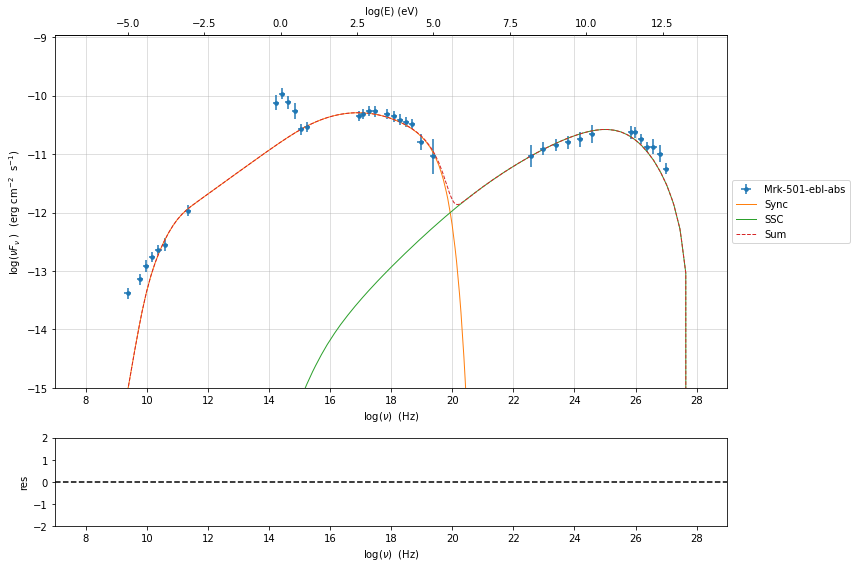

In [11]:
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)
jet.save_model('constrained_jet.pkl')